<a href="https://colab.research.google.com/github/Saurav021406/IPL-Data-Analysis/blob/main/DATA_SCIENCE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##                              **IPL DATA ANALYSIS**




**LOAD** **DATA**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
mat=pd.read_csv("/content/data/matches.csv")


In [30]:
dev=pd.read_csv("/content/data/deliveries.csv")

# New Section

In [31]:
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [32]:
mat.shape

(636, 18)

In [33]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [34]:
mat.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [35]:
# city with most matches won
mat.groupby(["city"]).agg({"winner":["count"]}).max()

,,0
winner,count,85


In [36]:
mat.groupby(["city"]).agg({"winner":["count"]}).sort_values(ascending=False,by=("winner","count")).head(1)

,winner
,count
city,
Mumbai,85


In [37]:
# team that won most matches
mat["winner"].value_counts().head(1)

,count
winner,
Mumbai Indians,92


In [38]:
# player who won most of man of the match awards
mat["player_of_match"].value_counts().head(1)

,count
player_of_match,
CH Gayle,18


In [39]:
# most frequent umpire 1
mat["umpire1"].value_counts().head(1)

,count
umpire1,
HDPK Dharmasena,73


In [40]:
# most frequent umpire 2

mat["umpire2"].value_counts().head(1)

,count
umpire2,
SJA Taufel,54


In [41]:
mat.describe().T

,count,mean,std,min,25%,50%,75%,max
id,636.0,318.500000,183.741666,1.0,159.75,318.5,477.25,636.0
season,636.0,2012.490566,2.773026,2008.0,2010.00,2012.0,2015.00,2017.0
dl_applied,636.0,0.025157,0.156726,0.0,0.00,0.0,0.00,1.0
win_by_runs,636.0,13.682390,23.908877,0.0,0.00,0.0,20.00,146.0
win_by_wickets,636.0,3.372642,3.420338,0.0,0.00,4.0,7.00,10.0
umpire3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
dev.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [43]:
dev.shape

(150460, 21)

In [44]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

3. visualizing the data

<Axes: xlabel='winner'>

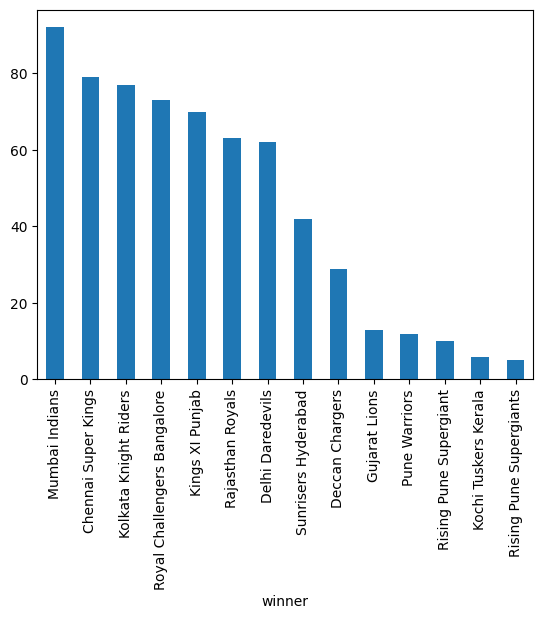

In [45]:
mat["winner"].value_counts().head(15).plot(kind="bar")

In [46]:
mat.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants'],
      dtype=object)

<Axes: xlabel='player_of_match'>

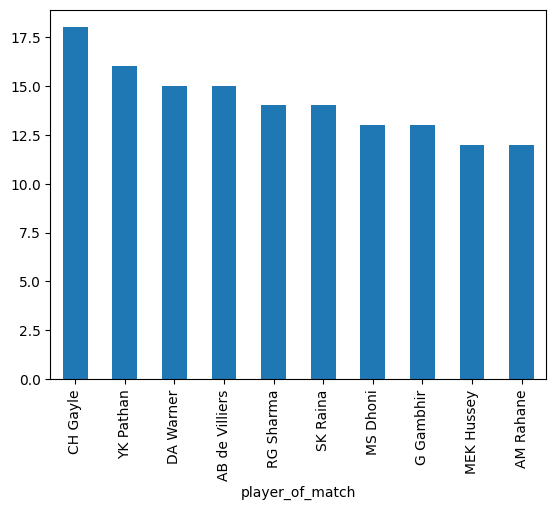

In [47]:
mat["player_of_match"].value_counts().head(10).plot(kind="bar")

<Axes: xlabel='toss_winner'>

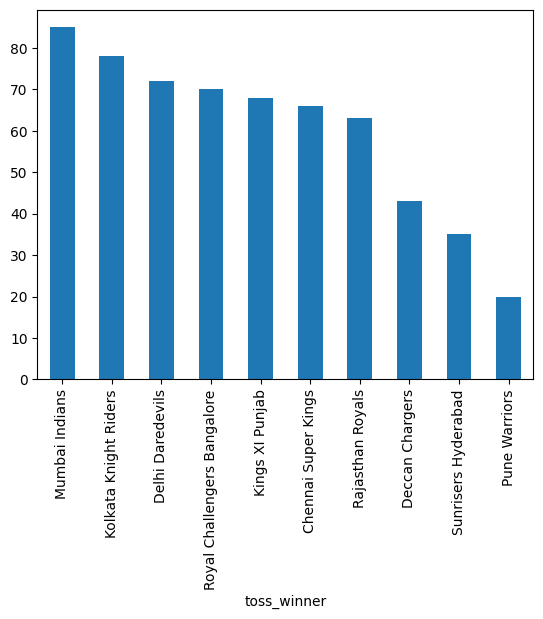

In [48]:
mat["toss_winner"].value_counts().head(10).plot(kind="bar")

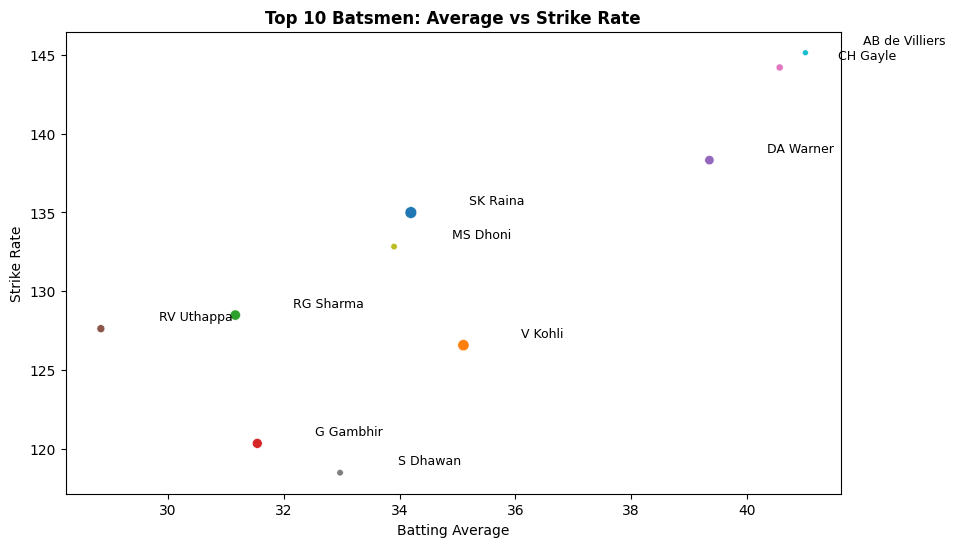

In [49]:
# Calculate total runs, balls faced, and dismissals
batting_stats = dev.groupby('batsman').agg({
    'batsman_runs': 'sum',
    'ball': 'count',
    'player_dismissed': 'count'
})

# Compute average and strike rate
batting_stats['average'] = batting_stats['batsman_runs'] / batting_stats['player_dismissed'].replace(0, np.nan)
batting_stats['strike_rate'] = batting_stats['batsman_runs'] / batting_stats['ball'] * 100

# Select top 10 batsmen by total runs
top10 = batting_stats.sort_values('batsman_runs', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='average',
    y='strike_rate',
    data=top10,
    size='batsman_runs',
    hue=top10.index,
    legend=False
)

# Label each point with batsman name
for i in top10.index:
    plt.text(top10.loc[i, 'average'] + 1, top10.loc[i, 'strike_rate'] + 0.5, i, fontsize=9)

plt.title("Top 10 Batsmen: Average vs Strike Rate", fontsize=12, fontweight='bold')
plt.xlabel("Batting Average")
plt.ylabel("Strike Rate")
plt.show()


In [50]:
mat.groupby(["toss_winner"]).agg({"winner":["count"]}).max()

,,0
winner,count,85


In [51]:
mat.groupby(["toss_winner"]).agg({"winner":["count"]}).sort_values(ascending=False,by=("winner","count")).head(1)

,winner
,count
toss_winner,
Mumbai Indians,85


In [58]:
mat=mat.rename(columns={"id":"match_id"})

In [53]:
mat

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [59]:
dev.head(250)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,YS Chahal,A Choudhary,BCJ Cutting,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
246,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,A Choudhary,YS Chahal,BCJ Cutting,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
247,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,A Choudhary,YS Chahal,BCJ Cutting,0,...,0,0,0,0,0,0,0,YS Chahal,run out,CJ Jordan (sub)
248,2,1,Mumbai Indians,Rising Pune Supergiant,1,1,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN


In [72]:
df.to_csv('ipl_data.csv', index=False)

In [61]:
df=pd.merge(mat,dev,on="match_id",how="left")

In [62]:
df.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [63]:
#total number of missing values
df.isnull().sum()

,0
match_id,0
season,0
city,1700
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [64]:
df.dropna(how="all", axis=1).head()


,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          150460 non-null  int64  
 1   season            150460 non-null  int64  
 2   city              148760 non-null  object 
 3   date              150460 non-null  object 
 4   team1             150460 non-null  object 
 5   team2             150460 non-null  object 
 6   toss_winner       150460 non-null  object 
 7   toss_decision     150460 non-null  object 
 8   result            150460 non-null  object 
 9   dl_applied        150460 non-null  int64  
 10  winner            150139 non-null  object 
 11  win_by_runs       150460 non-null  int64  
 12  win_by_wickets    150460 non-null  int64  
 13  player_of_match   150139 non-null  object 
 14  venue             150460 non-null  object 
 15  umpire1           150212 non-null  object 
 16  umpire2           15

In [66]:
mat.groupby(["season"]).agg({"match_id":"count"}).rename(columns={'match_id':'no. of matches'})

,no. of matches
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


/tmp/ipython-input-263587720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="season",data=mat,palette="Set2")


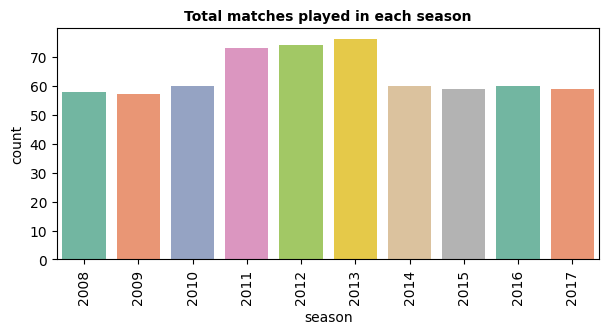

In [67]:
plt.subplots(figsize=(7, 3))
sns.countplot(x="season",data=mat,palette="Set2")
plt.xticks(rotation=90)
plt.title('Total matches played in each season', fontsize = 10, fontweight = "bold")
plt.show()

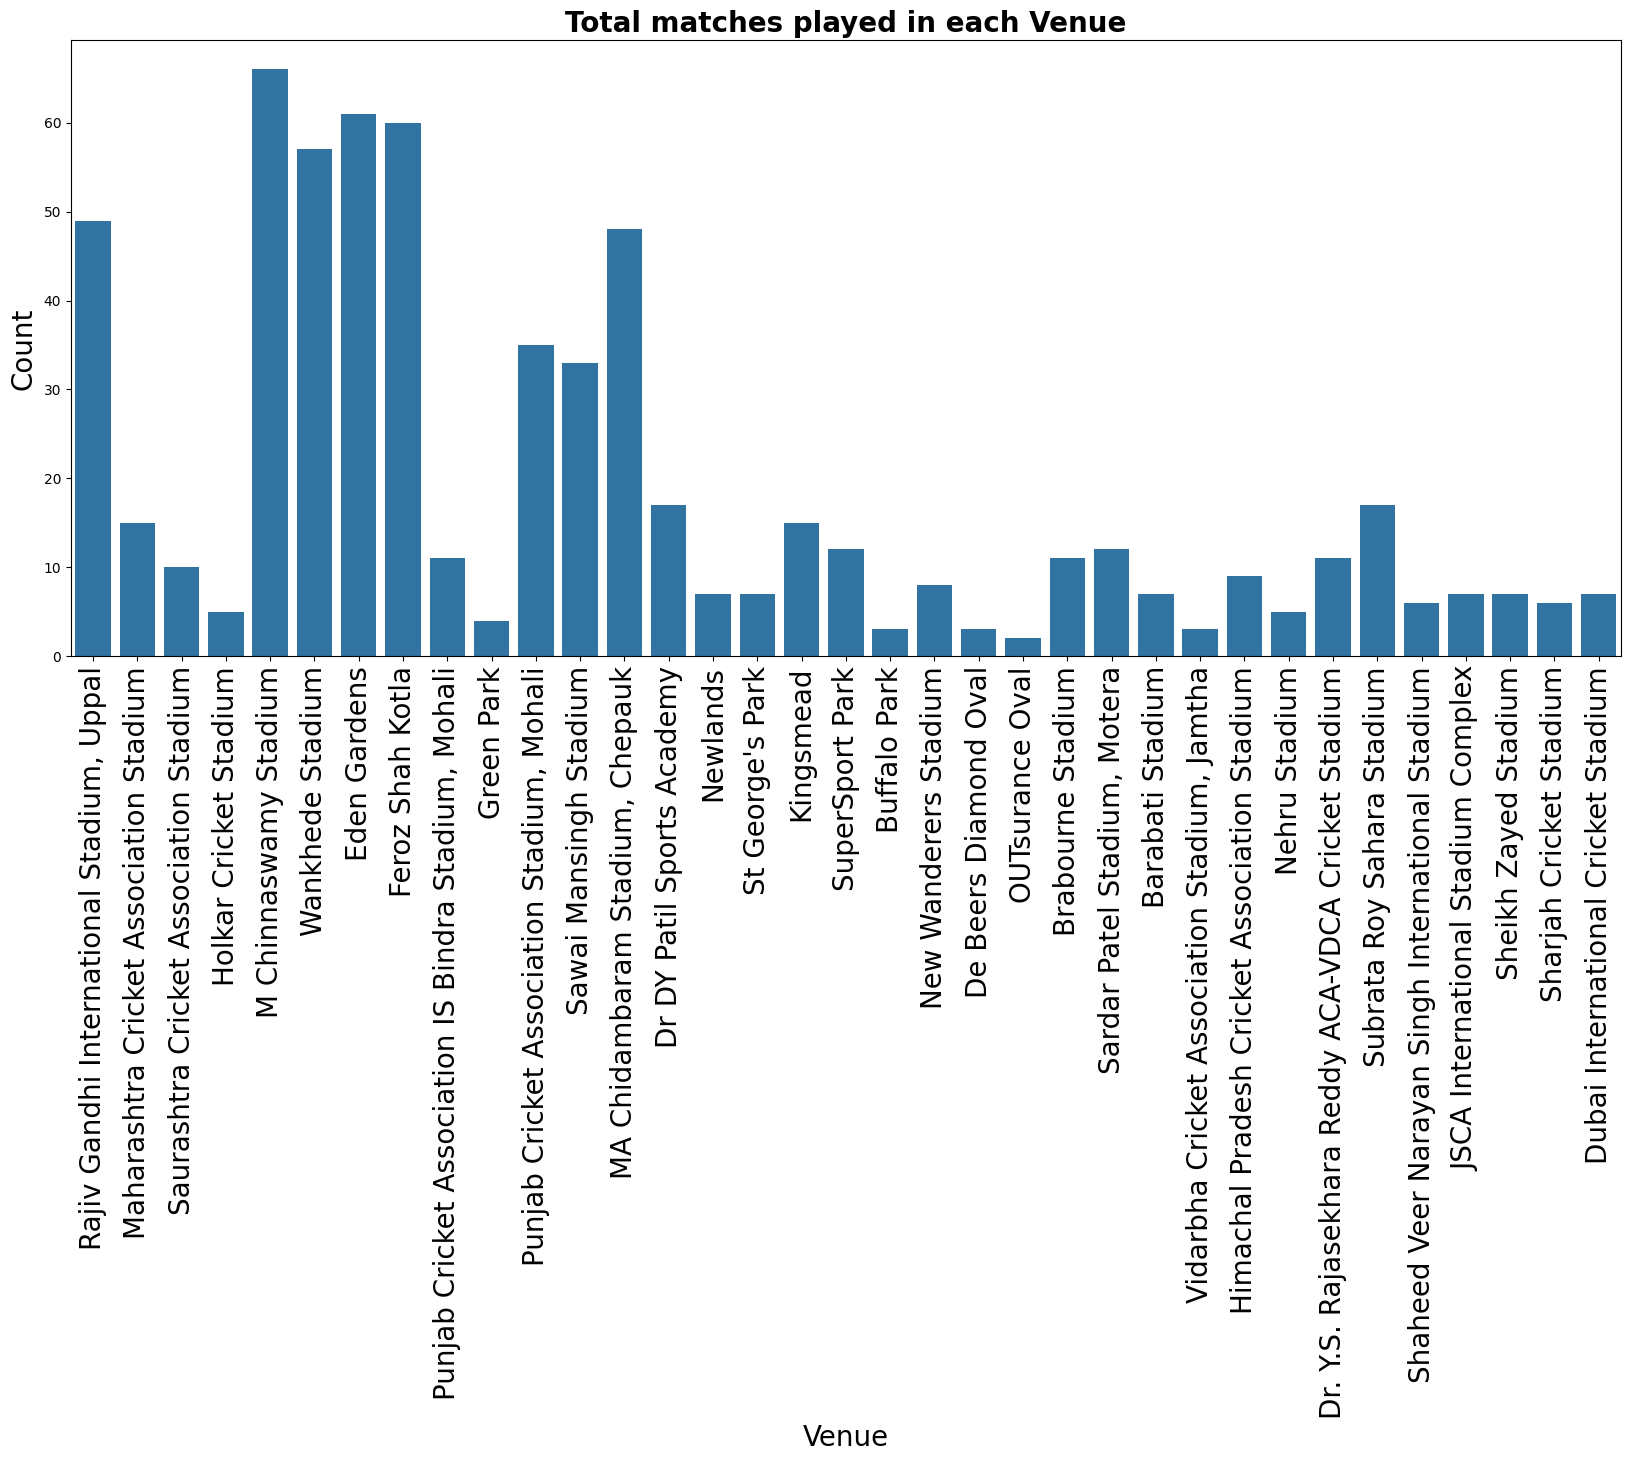

In [68]:
#Number of matches playes in each stadium

plt.subplots(figsize=(20, 8))
sns.countplot(x="venue",data=mat)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=10)
plt.xlabel('Venue', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Total matches played in each Venue', fontsize = 20, fontweight = "bold")
plt.show()

In [69]:
team_season = df.groupby(['season', 'batting_team'])['total_runs'].sum().reset_index()


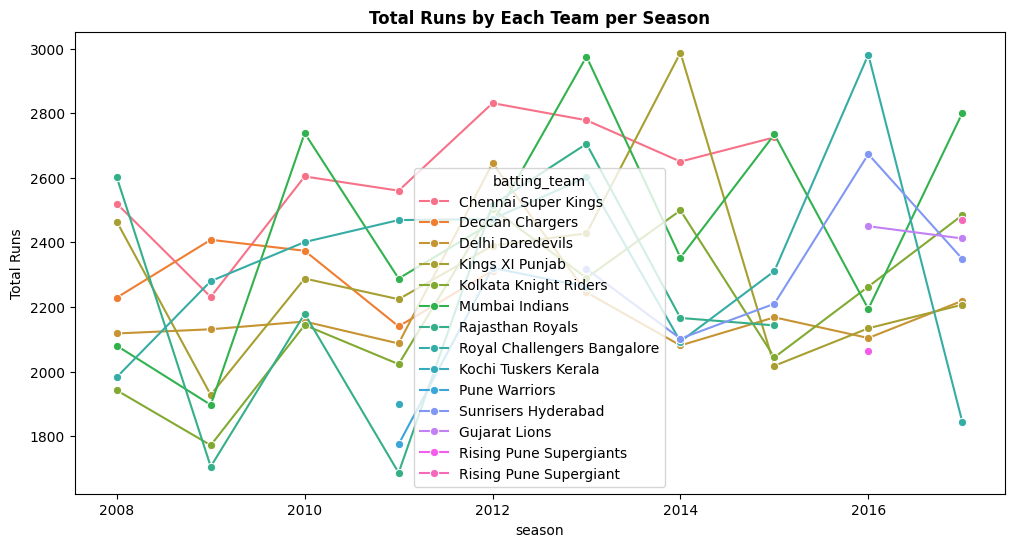

In [70]:
plt.figure(figsize=(12,6))
sns.lineplot(data=team_season, x='season', y='total_runs', hue='batting_team', marker='o')
plt.title("Total Runs by Each Team per Season", fontsize=12, fontweight='bold')
plt.ylabel("Total Runs")
plt.show()


In [71]:
dev.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [73]:
df.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [74]:
filter=["team1","toss_winner"]

In [75]:
tab=df[filter]
tab.groupby(["team1"]).agg("count")

,toss_winner
team1,
Chennai Super Kings,18415
Deccan Chargers,10335
Delhi Daredevils,14438
Gujarat Lions,3309
Kings XI Punjab,18130
Kochi Tuskers Kerala,1650
Kolkata Knight Riders,15825
Mumbai Indians,19813
Pune Warriors,4759


In [76]:
season=df.groupby(['season'])['total_runs'].sum()
season

,total_runs
season,
2008,17937
2009,16353
2010,18883
2011,21154
2012,22453
2013,22602
2014,18931
2015,18353
2016,18862


/tmp/ipython-input-2084891517.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=season,palette="magma")


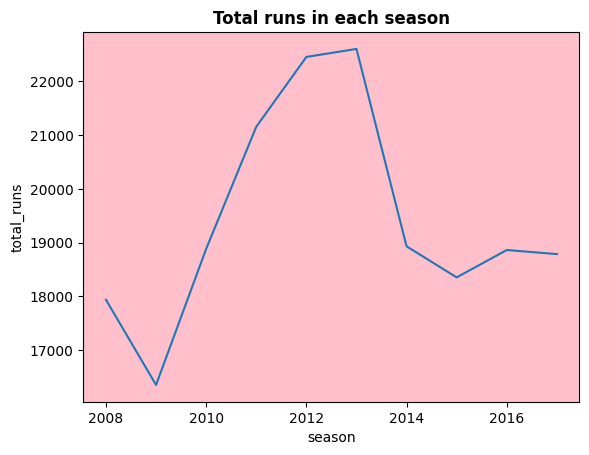

In [77]:
# season=df.groupby(['season'])['total_runs'].sum()
ax = plt.axes()
ax.set(facecolor = "pink")
sns.lineplot(data=season,palette="magma")
plt.title('Total runs in each season',fontsize=12,fontweight="bold")
plt.show()

In [78]:
x=dev.groupby(['batting_team'])['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=False)
y=x.reset_index(drop=True,inplace=True)
y
x

,batting_team,total_runs
0,Mumbai Indians,24521
1,Royal Challengers Bangalore,23436
2,Kings XI Punjab,23068
3,Kolkata Knight Riders,21965
4,Delhi Daredevils,21953
5,Chennai Super Kings,20899
6,Rajasthan Royals,17703
7,Sunrisers Hyderabad,11652
8,Deccan Chargers,11463
9,Pune Warriors,6358


Maximum toss won

In [79]:
mat["toss_winner"].value_counts().head(10)

,count
toss_winner,
Mumbai Indians,85
Kolkata Knight Riders,78
Delhi Daredevils,72
Royal Challengers Bangalore,70
Kings XI Punjab,68
Chennai Super Kings,66
Rajasthan Royals,63
Deccan Chargers,43
Sunrisers Hyderabad,35


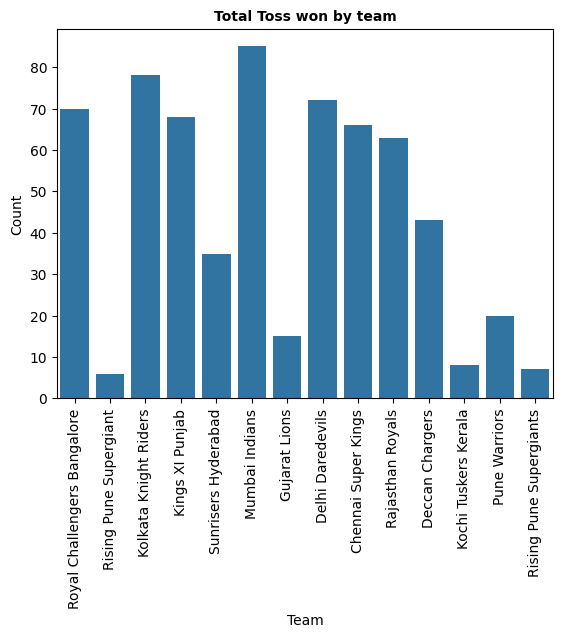

In [80]:
sns.countplot(x="toss_winner",data=mat)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Team', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total Toss won by team', fontsize = 10, fontweight = "bold")
plt.show()

Won the toss and win the match

In [81]:
k=mat.toss_decision[ mat.toss_winner==mat.winner]
k

,toss_decision
1,field
2,field
3,field
4,bat
5,field
...,...
629,field
631,field
632,field
634,field


/tmp/ipython-input-2083487014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="toss_decision", data=mat, hue=None, palette="Set2")


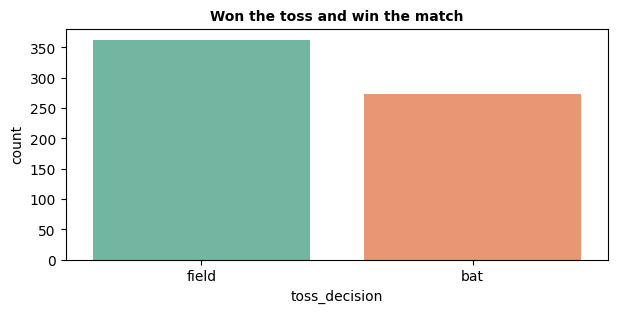

In [82]:
plt.subplots(figsize=(7,3))
sns.countplot(x="toss_decision", data=mat, hue=None, palette="Set2")
plt.title("Won the toss and win the match", fontsize=10, fontweight="bold")
plt.show()


In [83]:
mat.head(3)

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


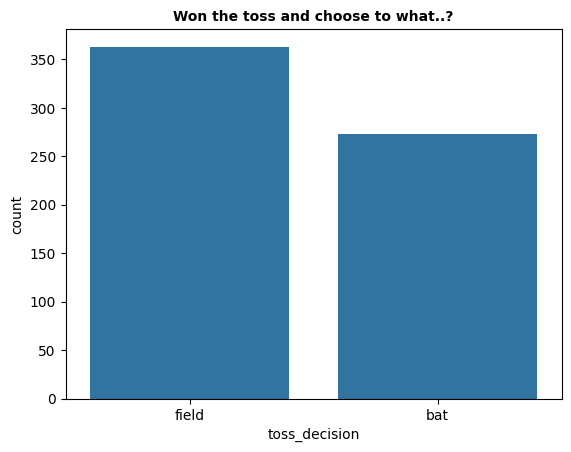

In [84]:
sns.countplot(x="toss_decision",data=mat)
plt.title("Won the toss and choose to what..?", fontsize = 10, fontweight = "bold")
plt.show()

<Axes: ylabel='count'>

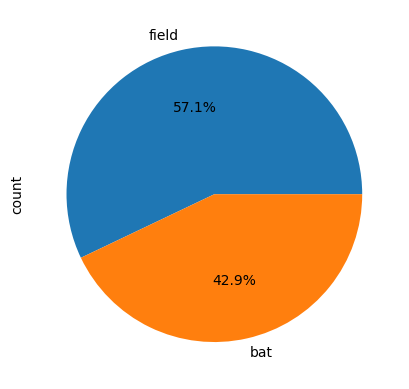

In [85]:
mat.toss_decision.value_counts().plot(kind="pie", autopct='%1.1f%%')

Batsman overview

In [86]:
dev.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

<Axes: xlabel='batsman'>

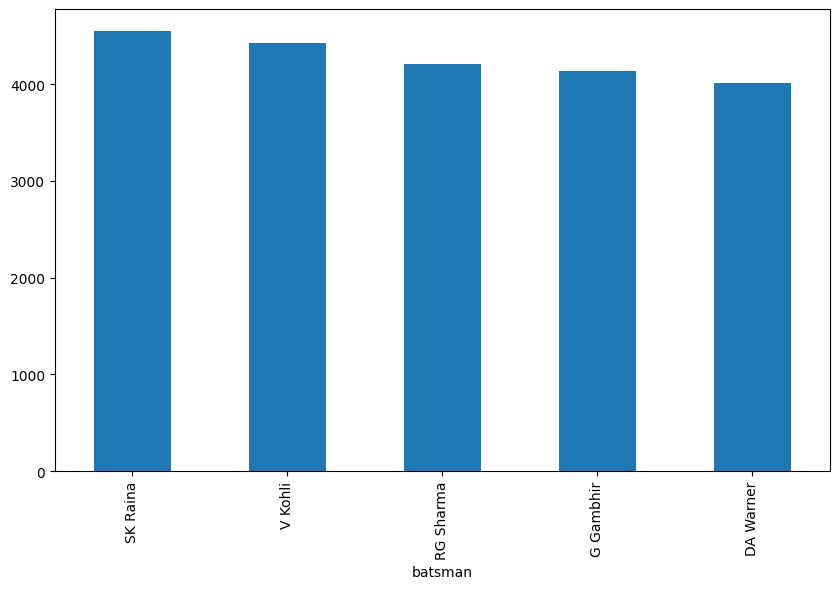

In [87]:
dev.groupby(["batsman"])["batsman_runs"].sum().sort_values(ascending=False).head(5).plot(kind="bar",figsize=(10,6))

In [88]:
player = (dev['batsman']=='V Kohli')
kohli =dev[player]

In [89]:
def count(kohli,runs):
    return len(kohli[kohli['batsman_runs']==runs])*runs

In [90]:
print("Runs scored from 1's :",count(kohli,1))
print("Runs scored from 2's :",count(kohli,2))
print("Runs scored from 3's :",count(kohli,3))
print("Runs scored from 4's :",count(kohli,4))
print("Runs scored from 6's :",count(kohli,6))

Runs scored from 1's : 1410
Runs scored from 2's : 484
Runs scored from 3's : 33
Runs scored from 4's : 1536
Runs scored from 6's : 960


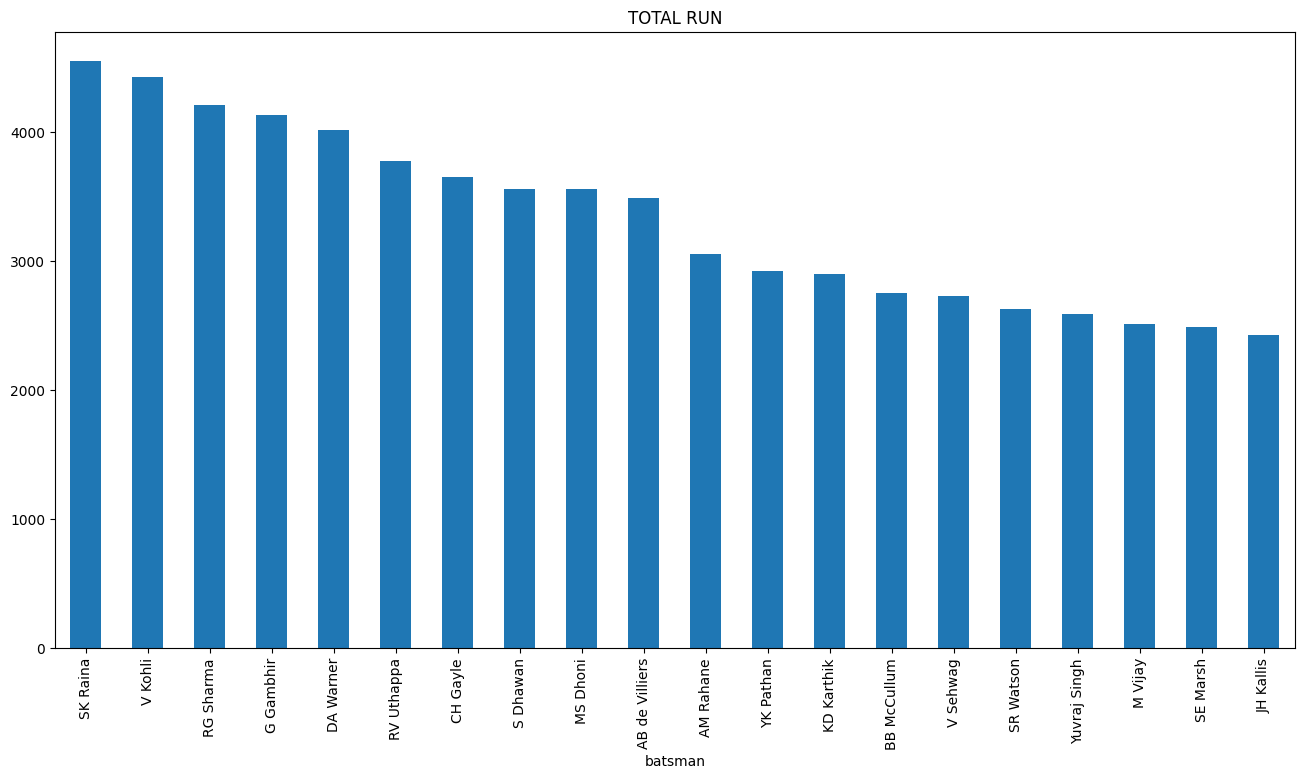

In [91]:
dev.groupby(["batsman"])["batsman_runs"].sum().sort_values(ascending=False).head(20).plot(kind="bar",figsize=(16,8))
plt.title("TOTAL RUN")
plt.show()

In [92]:
strike_rate=dev.groupby(["batsman"]).agg({"ball":"count","batsman_runs":"sum"}).sort_values(by="batsman_runs" ,ascending=False)

In [93]:
strike_rate["strike_rate"]=strike_rate.batsman_runs/strike_rate.ball*100

In [94]:
strike_rate.head(10)

,ball,batsman_runs,strike_rate
batsman,,,
SK Raina,3369,4548,134.995548
V Kohli,3494,4423,126.588437
RG Sharma,3274,4207,128.497251
G Gambhir,3433,4132,120.361200
DA Warner,2902,4014,138.318401
RV Uthappa,2960,3778,127.635135
CH Gayle,2532,3651,144.194313
S Dhawan,3005,3561,118.502496
MS Dhoni,2680,3560,132.835821


In [95]:
df.groupby(["batsman","season"])["batsman_runs"].sum().sort_values(ascending=False).head(10)

batsman         season
V Kohli         2016      973
DA Warner       2016      848
MEK Hussey      2013      733
CH Gayle        2012      733
                2013      720
AB de Villiers  2016      687
RV Uthappa      2014      660
DA Warner       2017      641
V Kohli         2013      639
SR Tendulkar    2010      618
Name: batsman_runs, dtype: int64

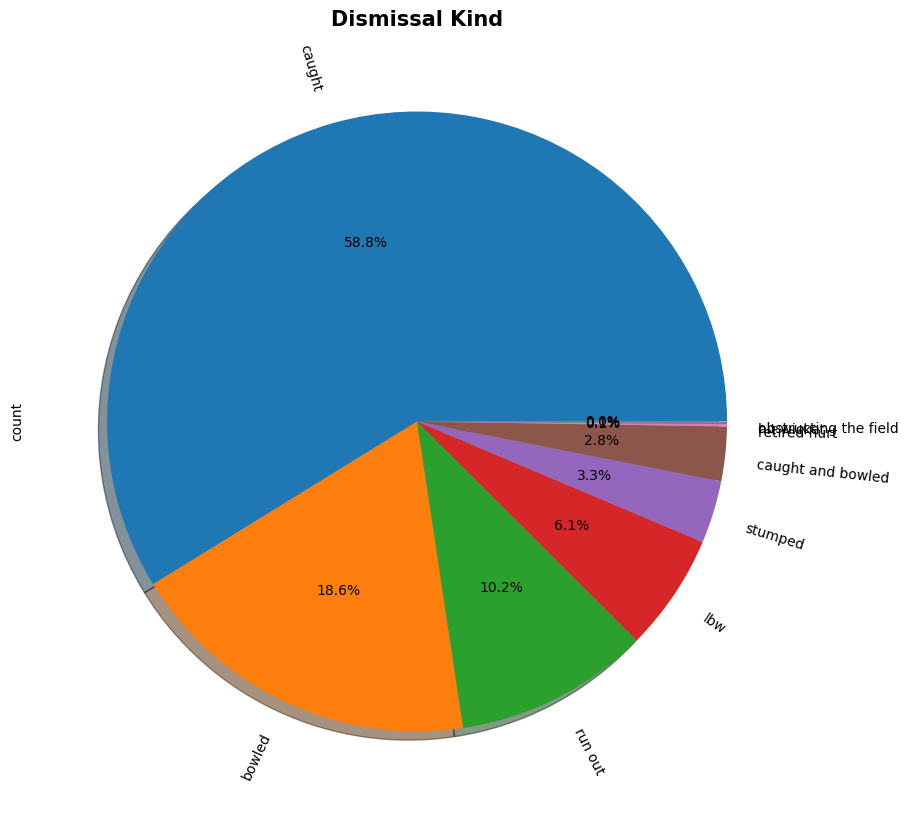

In [96]:
plt.subplots(figsize=(10, 18))
dev['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title("Dismissal Kind",fontweight="bold",fontsize=15)
plt.show()

BOwLING OVERVIEW

In [97]:
dev.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [98]:
eco=dev.groupby("bowler").agg({"batsman_runs":"sum","ball":"count"}).sort_values(by="ball",ascending=False)

In [99]:
eco["economy"]=eco["batsman_runs"]/(eco["ball"]/6)

In [100]:
eco.head(10)

,batsman_runs,ball,economy
bowler,,,
Harbhajan Singh,3295,2989,6.614252
A Mishra,3191,2703,7.083241
SL Malinga,2766,2694,6.160356
P Kumar,3106,2637,7.067122
PP Chawla,3198,2594,7.397070
R Ashwin,2409,2359,6.127173
Z Khan,2691,2276,7.094025
R Vinay Kumar,2862,2161,7.946321
DW Steyn,2209,2159,6.138953


In [101]:
dev.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [102]:
df.groupby('bowler').agg({'total_runs':'sum','ball':'count','player_dismissed':'count'}).sort_values(by=['total_runs'],ascending=False).head(10)

,total_runs,ball,player_dismissed
bowler,,,
Harbhajan Singh,3453,2989,136
P Kumar,3342,2637,102
PP Chawla,3315,2594,133
A Mishra,3305,2703,142
SL Malinga,3034,2694,170
R Vinay Kumar,2976,2161,125
Z Khan,2860,2276,119
DJ Bravo,2815,2110,137
UT Yadav,2802,2033,107


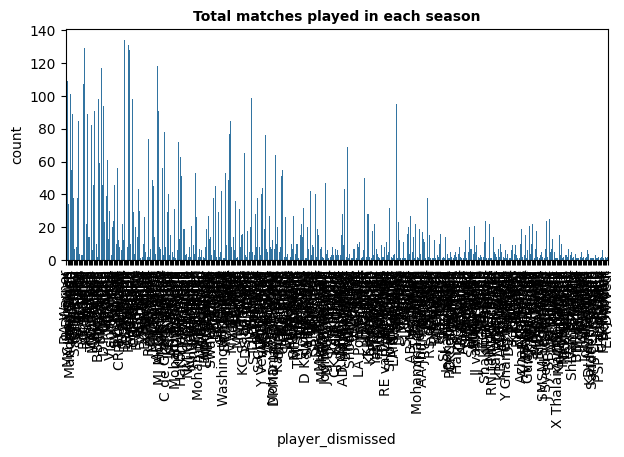

In [103]:
plt.subplots(figsize=(7, 3))
sns.countplot(x="player_dismissed",data=dev)
plt.xticks(rotation=90)
plt.title('Total matches played in each season', fontsize = 10, fontweight = "bold")
plt.show()

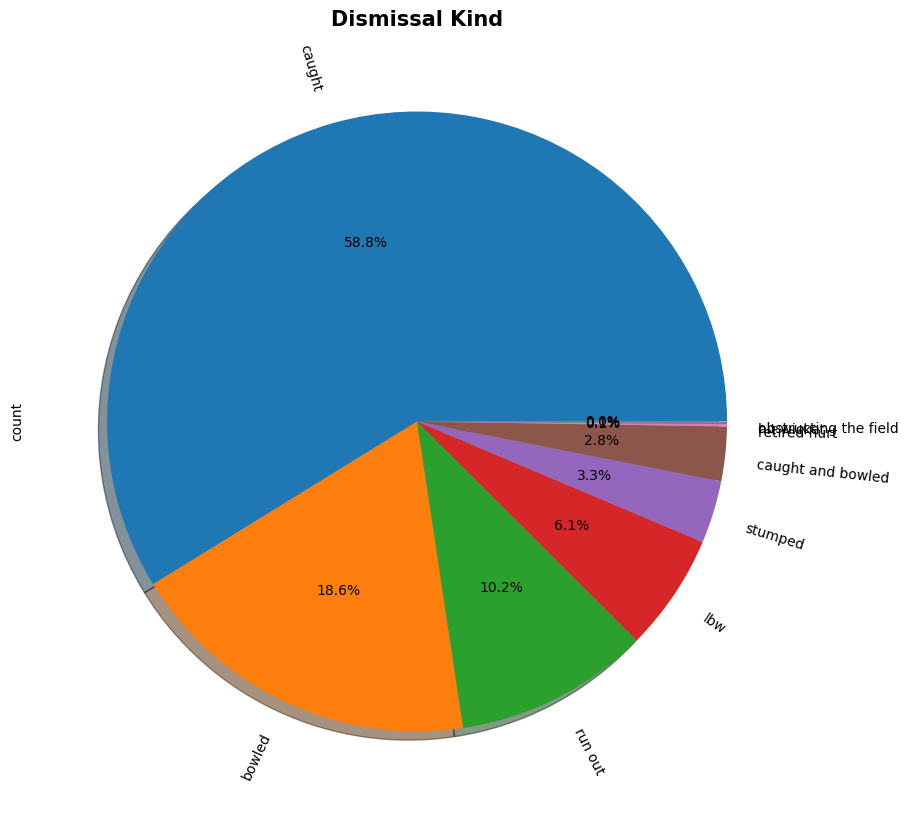

In [105]:
plt.subplots(figsize=(10, 18))
dev['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title("Dismissal Kind",fontweight="bold",fontsize=15)
plt.show()

TEAM PERFORMANCE

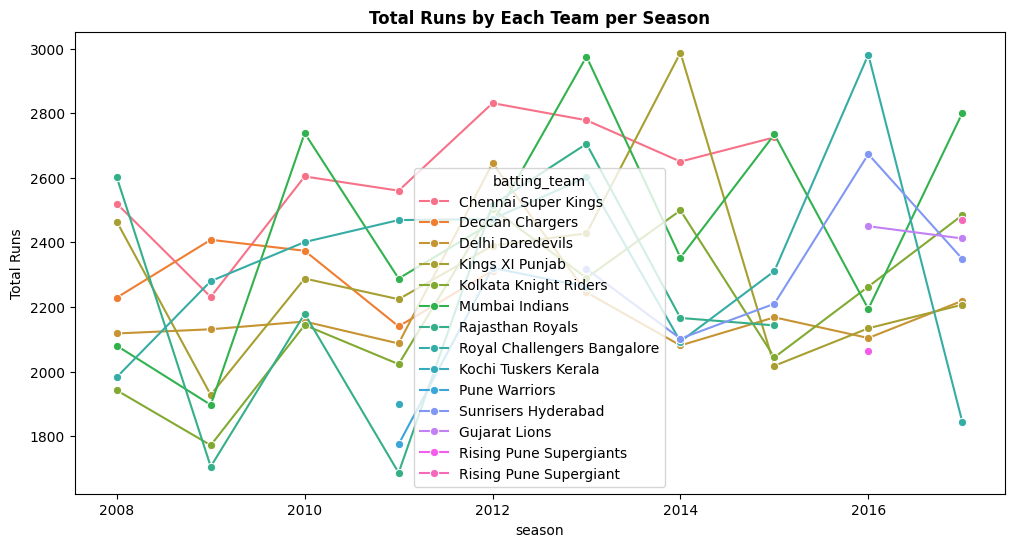

In [104]:

plt.figure(figsize=(12,6))
sns.lineplot(data=team_season, x='season', y='total_runs', hue='batting_team', marker='o')
plt.title("Total Runs by Each Team per Season", fontsize=12, fontweight='bold')
plt.ylabel("Total Runs")
plt.show()


Heatmap of Team vs Season Wins

SUMMARY

In [106]:
# 🏁 IPL SUMMARY SECTION

print("🏏 IPL DATA ANALYSIS SUMMARY")
print("──────────────────────────────────────────────")

# 1️⃣ Most successful team
top_team = mat['winner'].value_counts().idxmax()
print(f"🏆 Most Successful Team: {top_team}")

# 2️⃣ Most consistent batsman (highest total runs)
top_batsman = dev.groupby('batsman')['batsman_runs'].sum().idxmax()
top_batsman_runs = dev.groupby('batsman')['batsman_runs'].sum().max()
print(f"🔥 Top Batsman (Most Runs): {top_batsman} - {top_batsman_runs} runs")

# 3️⃣ Highest run-getter by season
top_batsman_season = df.groupby(['season', 'batsman'])['batsman_runs'].sum().reset_index()
top_in_season = top_batsman_season.loc[top_batsman_season['batsman_runs'].idxmax()]
print(f"🏅 Highest Run-Getter in a Single Season: {top_in_season['batsman']} ({int(top_in_season['batsman_runs'])} runs in {int(top_in_season['season'])})")

# 4️⃣ Most economical bowler (min 200 balls bowled)
bowler_stats = dev.groupby('bowler').agg({'total_runs':'sum', 'ball':'count'})
bowler_stats['economy'] = bowler_stats['total_runs'] / (bowler_stats['ball']/6)
best_economy = bowler_stats[bowler_stats['ball'] > 200]['economy'].idxmin()
eco_value = bowler_stats.loc[best_economy, 'economy']
print(f"🎯 Most Economical Bowler: {best_economy} (Economy {eco_value:.2f})")

# 5️⃣ Most matches hosted in a city
top_city = mat['city'].value_counts().idxmax()
print(f"🏟️ City Hosting Most Matches: {top_city}")

# 6️⃣ Most common dismissal type
top_dismissal = dev['dismissal_kind'].value_counts().idxmax()
print(f"💀 Most Common Dismissal Type: {top_dismissal}")

# 7️⃣ Player with most 'Player of the Match' awards
pom_player = mat['player_of_match'].value_counts().idxmax()
pom_count = mat['player_of_match'].value_counts().max()
print(f"⭐ Most 'Player of the Match' Awards: {pom_player} ({pom_count} times)")

# 8️⃣ Team that won most tosses
toss_champ = mat['toss_winner'].value_counts().idxmax()
print(f"🪙 Most Toss Wins: {toss_champ}")

# 9️⃣ Average runs per match
avg_match_runs = df.groupby('match_id')['total_runs'].sum().mean()
print(f"📈 Average Runs per Match: {avg_match_runs:.2f}")

# 10️⃣ Total seasons analyzed
total_seasons = mat['season'].nunique()
print(f"📅 Total Seasons Covered: {total_seasons}")

print("──────────────────────────────────────────────")


🏏 IPL DATA ANALYSIS SUMMARY
──────────────────────────────────────────────
🏆 Most Successful Team: Mumbai Indians
🔥 Top Batsman (Most Runs): SK Raina - 4548 runs
🏅 Highest Run-Getter in a Single Season: V Kohli (973 runs in 2016)
🎯 Most Economical Bowler: Sohail Tanvir (Economy 6.23)
🏟️ City Hosting Most Matches: Mumbai
💀 Most Common Dismissal Type: caught
⭐ Most 'Player of the Match' Awards: CH Gayle (18 times)
🪙 Most Toss Wins: Mumbai Indians
📈 Average Runs per Match: 305.53
📅 Total Seasons Covered: 10
──────────────────────────────────────────────
